In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np 


iris = pd.read_csv('iris.csv')


shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
79,5.7,2.6,3.5,1.0,versicolor
10,5.4,3.7,1.5,0.2,setosa
145,6.7,3.0,5.2,2.3,virginica
129,7.2,3.0,5.8,1.6,virginica


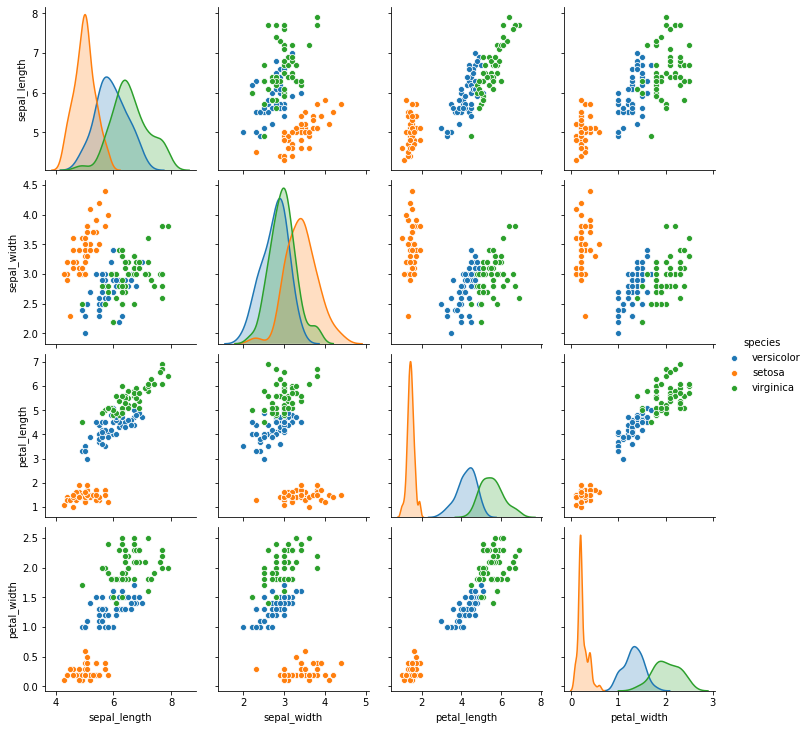

In [3]:
import seaborn as sns
sns.pairplot(iris,hue='species')

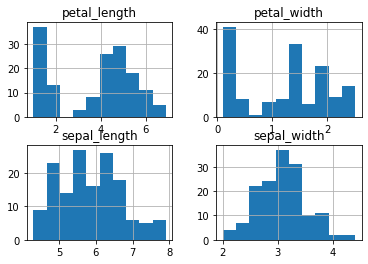

In [4]:
iris.hist()
plt.show()

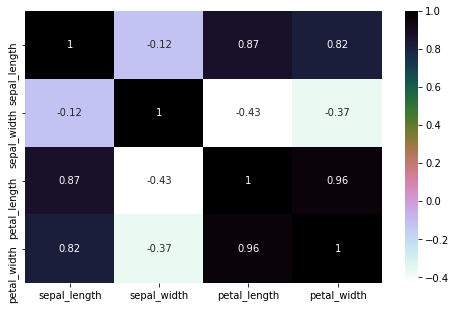

In [50]:
plt.figure(figsize=(8,5)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

### Une classe de réseau de neurones à 3 couches


In [5]:
def sigmoid_activation(a, theta):
    x = np.asarray(a) # convertit une entrée en tableau array
    theta = np.asarray(theta)
    return 1 / (1 + np.exp(-np.dot(theta.T,x)))


In [6]:
def feedforward(X,theta0,theta1):
    # on nourrit le réseau de neurones à partir de la première couche
    a1 = sigmoid_activation(X.T,theta0).T
    # on ajoute une colonne de 1 pour le biais
    a1 = np.column_stack([np.ones(a1.shape[0]),a1])
    # les unités d'activation sont ensuite imputées à la couche de sortie
    out = sigmoid_activation(a1.T,theta1)
    return out

In [7]:
def multiplecost(X,y,theta0,theta1):
    # nourrir le réseau de neurones
    h = feedforward(X,theta0,theta1)
    # calculer l'erreur
    inner = y*np.log(h)+(1-y)*np.log(1-h)
    # retourne la négation de l'erreur moyenne
    return -np.mean(inner)


In [8]:
class NNet3:
    def __init__(self, learning_rate=0.5, maxepochs=1e4, 
                 convergence_thres=1e-5, hidden_layer=4):
        self.learning_rate = learning_rate
        self.maxepochs = int(maxepochs)
        self.convergence_thres = 1e-5
        self.hidden_layer = int(hidden_layer)
        
    def _multiplecost(self, X, y):
        # on nourrit le réseau de neurones
        l1, l2 = self._feedforward(X) # on applique la fonction feedforward
        # on calcule l'erreur
        inner = y * np.log(l2) + (1-y) * np.log(1-l2)
        # négation de l'erreur moyenne
        return -np.mean(inner)
    
    def _feedforward(self, X):
        # données de la première couche
        l1 = sigmoid_activation(X.T, self.theta0).T
        # on ajoute une colonne de 1 pour le terme de biais
        l1 = np.column_stack([np.ones(l1.shape[0]), l1])
        # les unités d'activation sont ensuite imputées à la couche de soprtie
        l2 = sigmoid_activation(l1.T, self.theta1)
        return l1, l2
    
    def predict(self, X):
        _, y = self._feedforward(X)
        return y
    
    def learn(self, X, y):
        nobs, ncols = X.shape
        self.theta0 = np.random.normal(0,0.01,size=(ncols,self.hidden_layer))
        self.theta1 = np.random.normal(0,0.01,size=(self.hidden_layer+1,1))
        
        self.costs = []
        cost = self._multiplecost(X, y)
        self.costs.append(cost)
        costprev = cost + self.convergence_thres+1 # fixe un coût initial à ne pas dépasser
        counter = 0 # initialise un compteur
        
        # Boucle jusqu'à la convergence
        for counter in range(self.maxepochs):
            # on nourrit le réseau
            l1, l2 = self._feedforward(X)
            
            # on démarre la backpropagation
            # Calcul des gradients
            l2_delta = (y-l2) * l2 * (1-l2)
            l1_delta = l2_delta.T.dot(self.theta1.T) * l1 * (1-l1)
            
            # Update des paramètres par moyenne des gradients et en multipliant 
            # par le taux d'apprentissage
            self.theta1 += l1.T.dot(l2_delta.T) / nobs * self.learning_rate
            self.theta0 += X.T.dot(l1_delta)[:,1:] / nobs * self.learning_rate
            
            # Stockage des coûts et vérification de la convergence
            counter += 1 # décompte
            costprev = cost # Stockage du coût actuel dans prev cost
            cost = self._multiplecost(X, y) # on obtient le nouveau coût
            self.costs.append(cost)
            if np.abs(costprev-cost) < self.convergence_thres and counter > 500:
                break

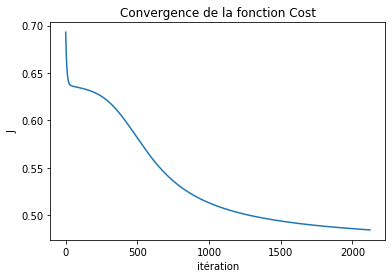

In [11]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'versicolor').values.astype(int)

# on fixe un taux d'apprentissage
learning_rate = 0.5
# nombre d'itérations max pour le gradient descent
maxepochs = 10000
# seuil de convergence de coût, par exemple (prevcost - cost) > convergence_thres
convergence_thres = 0.00001
# nombre de neurones ou unités d'activation par couche cachée
hidden_units = 4

# initialisation du modèle
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs, 
              convergence_thres=convergence_thres, hidden_layer=hidden_units)
# entrainement du modèle
model.learn(X,y)

# tracé l'évolution des coûts ou de l'erreur
plt.plot(model.costs)
plt.title('Convergence de la fonction Cost')
plt.ylabel('J')
plt.xlabel('itération')
plt.show()

In [45]:
n = X.shape[0]

X_train = X[:int((60 * n / 100))] 
y_train = y[:int((60 * n / 100))] 

X_test = X[-int((40 * n / 200)):] 
y_test = y[-int((40 * n / 200)):] 

In [46]:
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
             convergence_thres=convergence_thres, hidden_layer=4)

In [47]:
from sklearn.metrics import roc_auc_score

model.learn(X_train, y_train)

y_hat = model.predict(X_test)[0]

In [48]:
auc = roc_auc_score(y_test,y_hat)

In [49]:
auc

0.6666666666666667